# **Project Name**    - Mental Health in Tech Survey



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project presents an Exploratory Data Analysis (EDA) of the Mental Health in Tech Survey (2014) dataset with the objective of understanding how mental health is perceived, managed, and supported within technology organizations. The tech industry is known for its fast-paced environment and high performance expectations, which can increase stress and mental health challenges among employees. While mental health awareness has improved over time, organizations still face challenges in ensuring that employees feel safe, supported, and confident when addressing mental health concerns at work.

The dataset captures responses from professionals working in the tech sector and includes information on personal mental health history, treatment-seeking behavior, work interference, and various workplace factors such as benefits, anonymity, leave policies, and openness of communication. The analysis focuses on identifying patterns that explain employee behavior and highlight areas where organizations can improve mental health support.

One important insight from the analysis is the influence of personal awareness. Employees with a family history of mental illness are more likely to seek treatment, suggesting that familiarity and understanding play a key role in help-seeking behavior. This indicates that employees without prior exposure to mental health issues may benefit from targeted awareness and education initiatives to reduce hesitation and encourage early intervention.

A recurring theme throughout the analysis is lack of clarity. A significant proportion of respondents indicate that they are unsure whether mental health is treated as seriously as physical health, whether anonymity is protected, or how easy it is to take mental health leave. This uncertainty suggests that policies may exist but are not clearly communicated or consistently understood. From a business perspective, unclear policies reduce utilization and weaken the effectiveness of existing mental health initiatives.

Workplace culture also emerges as a critical factor. Employees generally feel more comfortable discussing mental health concerns with coworkers than with supervisors, indicating a trust gap between staff and management. Additionally, employees who have observed negative consequences for others are more likely to fear discussing mental health themselves. This shows that fear is often based on real workplace experiences rather than assumptions, underscoring the importance of leadership behavior and enforcement of non-discriminatory practices.

The analysis further examines organizational characteristics such as remote work and company size. Remote work alone does not significantly change patterns of mental health interference, suggesting that flexibility must be supported by broader wellness strategies to be effective. While larger organizations are more likely to offer formal mental health benefits, uncertainty around access and usage remains common across companies of all sizes.

Overall, the findings indicate that effective mental health support in the tech workplace depends on more than just policy availability. It requires clear communication, consistent leadership support, confidentiality, and a culture that actively reduces stigma. Organizations that address these areas are better positioned to improve employee well-being, reduce productivity loss due to mental health issues, and build a healthier, more resilient workforce.

# **GitHub Link -**

[https://github.com/Akashdeep2696/Mental-Health-in-Tech-Survey-EDA.git](https://)

# **Problem Statement**


Mental health is an increasingly important factor influencing employee well-being, productivity, and retention, particularly in the technology sector where high workloads and performance pressure are common. Although awareness of mental health has grown, many employees continue to face barriers such as stigma, fear of negative consequences, and lack of clarity around workplace support systems.

The Mental Health in Tech Survey (2014) provides insight into employees' mental health experiences, treatment-seeking behavior, and perceptions of workplace policies. This project aims to analyze the survey data to understand how personal factors and organizational practices influence mental health outcomes in the tech workplace. The objective is to identify actionable insights that can help organizations strengthen mental health support, improve employee confidence in existing policies, and foster a more supportive work environment.

#### **Define Your Business Objective?**

The primary business objective is to identify factors that influence mental health treatment, disclosure, and work interference among tech professionals. By understanding how workplace policies (benefits, anonymity, leave), organizational culture (stigma, fear of consequences), and personal factors (family history) interact, organizations can design more effective mental health support systems that improve employee well-being and productivity.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from io import StringIO
%matplotlib inline
sns.set(style="whitegrid")

# For modularity, I have defined a function to load data
def load_dataset():
    survey = pd.read_csv('survey.csv')
    return survey

### Dataset Loading

In [35]:
# Load Dataset
try:
    survey = load_dataset()
except FileNotFoundError:
    print("Dataset file not found. Please ensure 'survey.csv' is in the current directory.")

### Dataset First View

In [36]:
# Dataset First Look
print("Survey Dataset Head:")
display(survey.head())

Survey Dataset Head:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [37]:
# Dataset Rows & Columns count
print(f"Survey shape: {survey.shape}")

Survey shape: (1259, 27)


### Dataset Information

In [38]:
# Dataset Info
print("Survey Info:")
survey.info()

Survey Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object


#### Duplicate Values

In [39]:
# Dataset Duplicate Value Count
print(f"Duplicates in Survey: {survey.duplicated().sum()}")

Duplicates in Survey: 1


#### Missing Values/Null Values

In [40]:
# Missing Values/Null Values Count
print("Missing values in Survey:")
display(survey.isnull().sum())

Missing values in Survey:


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


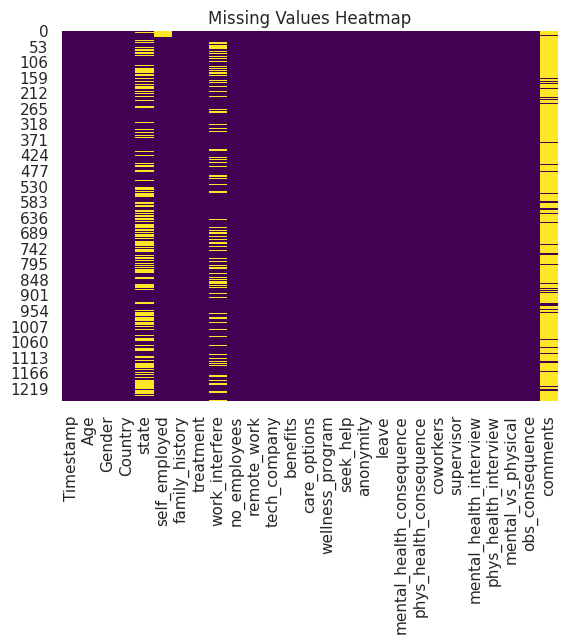

In [41]:
# Visualizing the missing values
sns.heatmap(survey.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

From an initial look we can confirm that the dataset has 27 columns and 1259 rows. There is only one dublicate in the dataset and only four columns have null values.

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns
print("Survey Columns:", survey.columns.tolist())

Survey Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [43]:
# Dataset Describe
# Numerical statistics from Survey
print("\nSurvey Dataset - Numerical Columns Statistics:")
display(survey.describe())

# Categorical statistics from Survey
print("\nSurvey Dataset - Categorical Columns Statistics:")
for col in survey.columns:
    print(f"\n{col}:")
    print(f"Unique values: {survey[col].nunique()}")
    print(f"Top 5 values:\n{survey[col].value_counts().head()}")
    print(f"-"*30)


Survey Dataset - Numerical Columns Statistics:


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11



Survey Dataset - Categorical Columns Statistics:

Timestamp:
Unique values: 884
Top 5 values:
Timestamp
27-08-2014 12:31    8
27-08-2014 15:23    8
27-08-2014 15:24    8
27-08-2014 11:43    7
27-08-2014 12:48    6
Name: count, dtype: int64
------------------------------

Age:
Unique values: 53
Top 5 values:
Age
29    85
32    82
26    75
27    71
33    70
Name: count, dtype: int64
------------------------------

Gender:
Unique values: 49
Top 5 values:
Gender
Male      615
male      206
Female    121
M         116
female     62
Name: count, dtype: int64
------------------------------

Country:
Unique values: 48
Top 5 values:
Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Name: count, dtype: int64
------------------------------

state:
Unique values: 45
Top 5 values:
state
CA    138
WA     70
NY     57
TN     45
TX     44
Name: count, dtype: int64
------------------------------

self_employed:
Unique values: 2
Top 5 

### Variables Description

* **Timestamp**: Date of response.
* **Age**: Respondent's age (numerical, with outliers).
* **Gender**: Self-identified gender (needs cleaning to Male/Female/Other).
* **Country**: Residence country (48 unique, mostly US).
* **state**: US state (45 unique, NaN for non-US).
* **self_employed**: Yes/No/NaN.
* **family_history**: Family mental illness history (Yes/No).
* **treatment**: Sought treatment (Yes/No).
* **work_interfere**: Mental health interferes with work (Often/Sometimes/Rarely/Never/NA).
* **no_employees**: Company size categories.
* **remote_work**: Remote >50% time (Yes/No).
* **tech_company**: Primarily tech (Yes/No).
* **benefits**: Mental health benefits (Yes/No/Don't know).
* **care_options**: Know care options (Yes/No/Not sure).
* **wellness_program**: Discussed in wellness program (Yes/No/Don't know).
* **seek_help**: Resources provided (Yes/No/Don't know).
* **anonymity**: Protected anonymity (Yes/No/Don't know).
* **leave**: Ease of leave (Very easy/Somewhat easy/etc.).
* **mental_health_consequence**: Negative consequence discussing mental health (Yes/No/Maybe).
* **phys_health_consequence**: Negative for physical (Yes/No/Maybe).
* **coworkers**: Discuss with coworkers (Yes/Some/No).
* **supervisor**: Discuss with supervisor (Yes/Some/No).
* **mental_health_interview**: Bring up in interview (Yes/No/Maybe).
* **phys_health_interview**: Physical in interview (Yes/No/Maybe).
* **mental_vs_physical**: Employer takes seriously (Yes/No/Don't know).
* **obs_consequence**: Observed negative consequences (Yes/No).
* **comments**: Open text.

### Check Unique Values for each variable.

In [44]:
# Check Unique Values for each variable.
for col in survey.columns:
    print(f"Unique values in {col} : {survey[col].nunique()}")
    print(survey[col].unique()[:6])  # First 6 for brevity

Unique values in Timestamp : 884
['27-08-2014 11:29' '27-08-2014 11:30' '27-08-2014 11:31'
 '27-08-2014 11:32' '27-08-2014 11:33' '27-08-2014 11:34']
Unique values in Age : 53
[37 44 32 31 33 35]
Unique values in Gender : 49
['Female' 'M' 'Male' 'male' 'female' 'm']
Unique values in Country : 48
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal']
Unique values in state : 45
['IL' 'IN' nan 'TX' 'TN' 'MI']
Unique values in self_employed : 2
[nan 'Yes' 'No']
Unique values in family_history : 2
['No' 'Yes']
Unique values in treatment : 2
['Yes' 'No']
Unique values in work_interfere : 4
['Often' 'Rarely' 'Never' 'Sometimes' nan]
Unique values in no_employees : 6
['Jun-25' 'More than 1000' '26-100' '100-500' '01-May' '500-1000']
Unique values in remote_work : 2
['No' 'Yes']
Unique values in tech_company : 2
['Yes' 'No']
Unique values in benefits : 3
['Yes' "Don't know" 'No']
Unique values in care_options : 3
['Not sure' 'No' 'Yes']
Unique values in wellness_program : 3

## 3. ***Data Wrangling***

### Data Wrangling Code

In [45]:
# Write your code to make your dataset analysis ready.

# Making an Original Copy
survey_original=survey.copy()

# Replace 'NA' with 'Not Applicable' for non-U.S. countries
survey.loc[(survey['Country'] != 'United States'), 'state'] = 'Not Applicable'

# Handle missing values
survey['state'].fillna('No data', inplace=True)
survey['self_employed'].fillna('No', inplace=True)
survey['work_interfere'].fillna('NA', inplace=True)
survey['comments'].fillna('No Comment', inplace=True)

# Clean Age
survey['Age'] = survey['Age'].apply(lambda x: np.nan if x < 18 or x > 75 else x)
survey['Age'].fillna(survey['Age'].median(), inplace=True)

# Clean Gender
survey['Gender'] = survey['Gender'].str.lower().str.strip()
male_terms = ['male', 'm', 'man', 'cis male', 'cis man', 'male (cis)', 'mail', 'maile', 'mal', 'make', 'malr', 'msle']
female_terms = ['female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femail', 'femake', 'female (cis)']
survey['Gender'] = survey['Gender'].apply(lambda x: 'Male' if x in male_terms else ('Female' if x in female_terms else 'Other'))

# Clean No of Employees
survey['no_employees'] = survey['no_employees'].apply(lambda x: '06-25' if x == 'Jun-25' else ('01-05' if x == '01-May' else x))

### What all manipulations have you done and insights you found?

To make the dataset analysis-ready, an original copy of the data was first created to preserve the raw dataset. The state column was standardized by marking non-U.S. responses as “Not Applicable” and filling missing state values with “No data” to maintain consistency. Missing values in other fields were handled using meaningful defaults: self_employed was filled with “No”, work_interfere with “NA”, and comments with “No Comment”.

The Age column was cleaned by removing unrealistic values (below 18 and above 75) and replacing them with the median age to avoid distortion in age-based analysis. Gender values were standardized by converting text to lowercase, trimming spaces, and grouping multiple variations into three clear categories: Male, Female, and Other. This reduced noise caused by inconsistent text entries. The no_employees column was also corrected by fixing mislabeled ranges to ensure accurate company size categorization.

From these manipulations, it was observed that the dataset contained inconsistent categorical entries, missing values, and invalid age records, which are common in survey-based data. Cleaning and standardizing these fields helped improve data quality and ensured that further analysis and visualizations would be reliable and meaningful.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Age Distribution

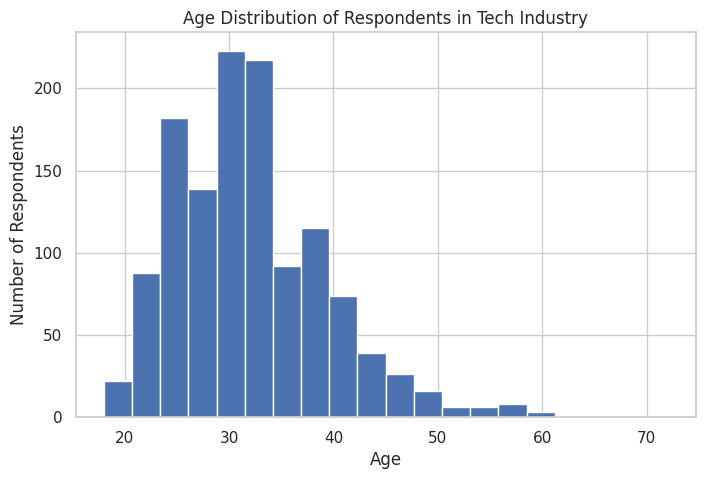

In [46]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
survey['Age'].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.title("Age Distribution of Respondents in Tech Industry")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is chosen because age is a continuous numerical variable. This chart helps in understanding the distribution, concentration, and spread of respondents across different age groups, while also identifying potential outliers.

##### 2. What is/are the insight(s) found from the chart?

* The majority of respondents belong to the 25–40 age group.

* This indicates that mental health concerns are most prominent among early to mid-career professionals in the tech industry.

* Very few respondents fall in extreme age ranges, suggesting a workforce dominated by young professionals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since younger professionals form the majority, organizations can focus on early mental health intervention programs, stress management workshops, and work-life balance initiatives. Addressing mental health at this stage can improve employee productivity, retention, and long-term workforce stability.

#### Chart - 2 : Gender Distribution

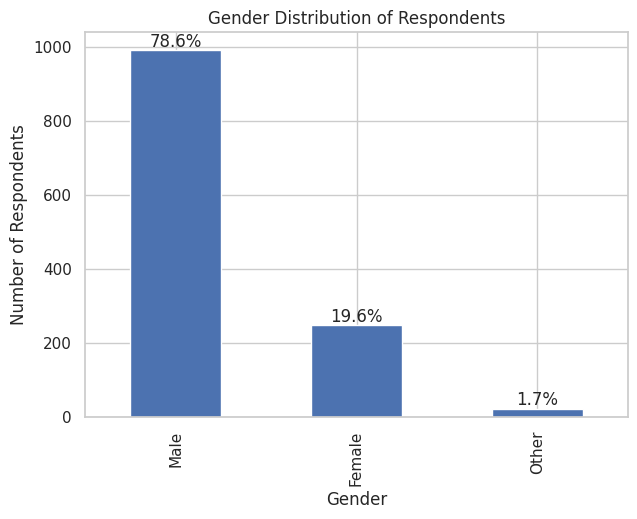

In [47]:
# Chart - 2 visualization code
plt.figure(figsize=(7,5))

gender_counts = survey['Gender'].value_counts()
gender_pct = (gender_counts / gender_counts.sum()) * 100

ax = gender_counts.plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.title("Gender Distribution of Respondents")

# Add percentage labels on top of bars
for i, value in enumerate(gender_counts):
    plt.text(i, value, f"{gender_pct[i]:.1f}%", ha='center', va='bottom')

plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is suitable because gender is a categorical variable. Adding percentage labels helps in clearly understanding the proportional representation of each gender group, making the comparison more meaningful.

##### 2. What is/are the insight(s) found from the chart?


* Male respondents constitute the majority of the dataset, accounting for a significantly higher percentage.

* Female and other gender groups represent a much smaller proportion of the total respondents.

* This highlights the gender imbalance prevalent in the tech industry, as well as possible underrepresentation in survey participation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding both absolute numbers and percentages helps organizations recognize representation gaps and design inclusive mental health strategies. This can lead to improved employee engagement, diversity, and a more supportive work environment.

#### Chart - 3 : Mental Health Treatment Status

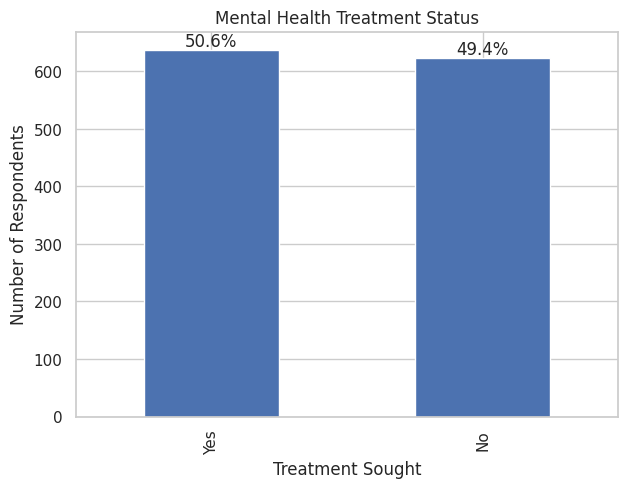

In [48]:
# Chart - 3 visualization code
plt.figure(figsize=(7,5))

treat_counts = survey['treatment'].value_counts()
treat_pct = (treat_counts / treat_counts.sum()) * 100

ax = treat_counts.plot(kind='bar')

plt.xlabel("Treatment Sought")
plt.ylabel("Number of Respondents")
plt.title("Mental Health Treatment Status")

# Add percentage labels
for i, value in enumerate(treat_counts):
    plt.text(i, value, f"{treat_pct[i]:.1f}%", ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen because the treatment variable is categorical. Displaying both counts and percentages allows for a clear comparison of how many respondents have sought mental health treatment versus those who have not.

##### 2. What is/are the insight(s) found from the chart?

* A significant proportion of respondents have sought mental health treatment, indicating that mental health issues are common in the tech industry.

* However, a comparable number of respondents have not sought treatment, which may be due to stigma, lack of awareness, or limited access to mental health resources.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that many employees require mental health support highlights the need for accessible mental healthcare programs. Providing early support can reduce burnout, improve productivity, and lower employee turnover.

#### Chart - 4 : Impact of Mental Heath on Work Performance

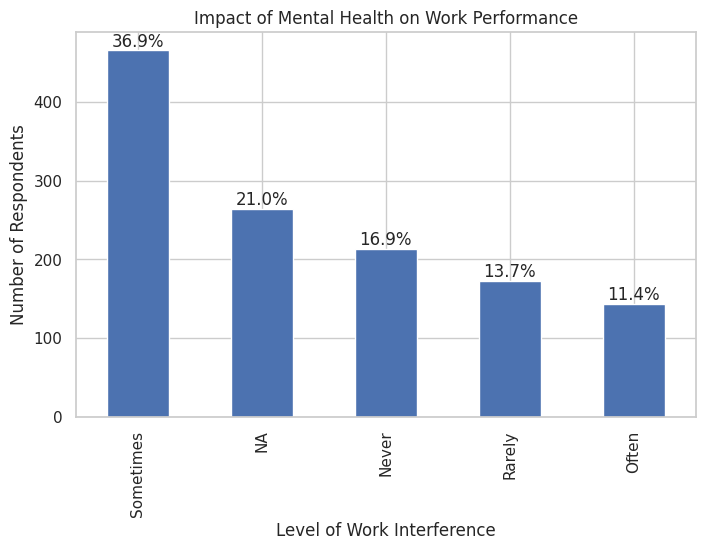

In [49]:
# Chart - 4 visualization code
plt.figure(figsize=(8,5))

work_counts = survey['work_interfere'].value_counts()
work_pct = (work_counts / work_counts.sum()) * 100

ax = work_counts.plot(kind='bar')

plt.xlabel("Level of Work Interference")
plt.ylabel("Number of Respondents")
plt.title("Impact of Mental Health on Work Performance")

# Add percentage labels on bars
for i, value in enumerate(work_counts):
    plt.text(i, value, f"{work_pct[i]:.1f}%", ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen because the level of work interference is a categorical variable. This chart clearly shows how mental health issues affect employees' work performance at different levels, along with their relative proportions.

##### 2. What is/are the insight(s) found from the chart?

* A large number of respondents report that mental health sometimes or often interferes with their work.

* Very few respondents indicate that mental health never interferes with their job.

* This suggests that mental health challenges have a direct impact on workplace productivity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that mental health frequently affects work performance allows organizations to implement flexible work policies, mental health days, and workload management strategies, which can reduce absenteeism and improve employee efficiency.

#### Chart - 5 : Perception of Mental vs Physical Health Seriousness

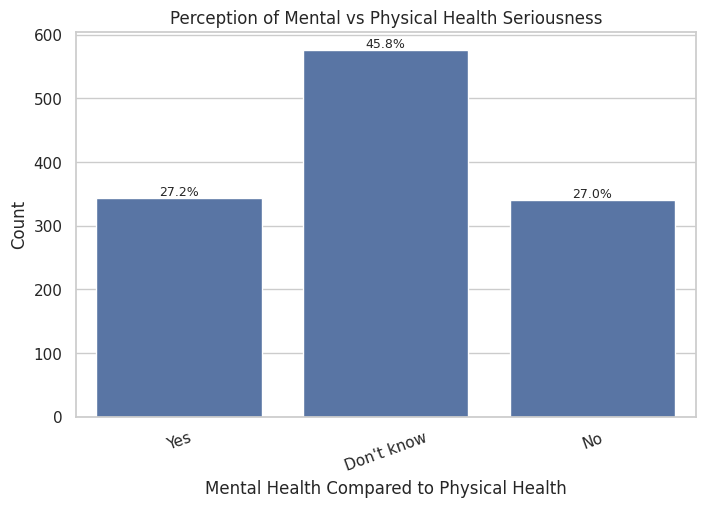

In [50]:
# Chart - 5 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='mental_vs_physical',
    data=survey
)

plt.title('Perception of Mental vs Physical Health Seriousness')
plt.xlabel('Mental Health Compared to Physical Health')
plt.ylabel('Count')
plt.xticks(rotation=20)

# Add percentage labels
total = len(survey)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = (height / total) * 100
        ax.text(
            x, height,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because the perception of mental health compared to physical health is a categorical variable. This chart clearly shows how employees perceive the seriousness of mental health relative to physical health.

##### 2. What is/are the insight(s) found from the chart?

* The largest proportion of respondents selected “Don't know”, indicating uncertainty or lack of clarity in comparing mental and physical health seriousness.

* Approximately 27.2% of respondents believe that mental health is as serious as physical health.

* A similar proportion believe that mental health is not as serious as physical health.

* This distribution suggests that while awareness exists, a significant portion of employees lack clear understanding or conviction regarding mental health parity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high percentage of uncertainty highlights an opportunity for organizations to invest in mental health education and awareness programs. Improving understanding can help normalize mental health discussions, encourage help-seeking behavior, and support more informed workplace policies.

#### Chart - 6 : Ease of Taking Leave for Mental Health

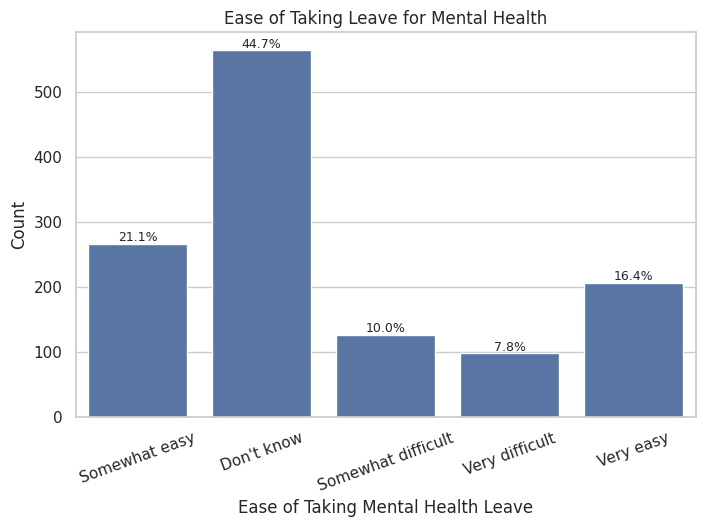

In [51]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='leave',
    data=survey
)

plt.title('Ease of Taking Leave for Mental Health')
plt.xlabel('Ease of Taking Mental Health Leave')
plt.ylabel('Count')
plt.xticks(rotation=20)

# Add percentage labels
total = len(survey)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = (height / total) * 100
        ax.text(
            x, height,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because ease of taking leave for mental health is a categorical variable. This chart clearly shows how employees perceive the accessibility of mental health leave within their organizations.

##### 2. What is/are the insight(s) found from the chart?

* The largest proportion of respondents selected “Don't know”, indicating significant uncertainty or lack of clarity regarding mental health leave policies.

* About 21.1% of employees find it somewhat easy, and 16.4% find it very easy to take mental health leave.

* In contrast, about 10.0% find it somewhat difficult, and about 7.8% find it very difficult.

* Overall, while a reasonable portion finds mental health leave accessible, a substantial number of employees are unsure about the process or policy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high level of uncertainty highlights the need for organizations to clearly communicate mental health leave policies. Improving awareness and transparency can encourage employees to take necessary time off, reduce burnout and support long-term productivity and well-being.

#### Chart - 7 : Mental Health Treatment by Gender

<Figure size 800x500 with 0 Axes>

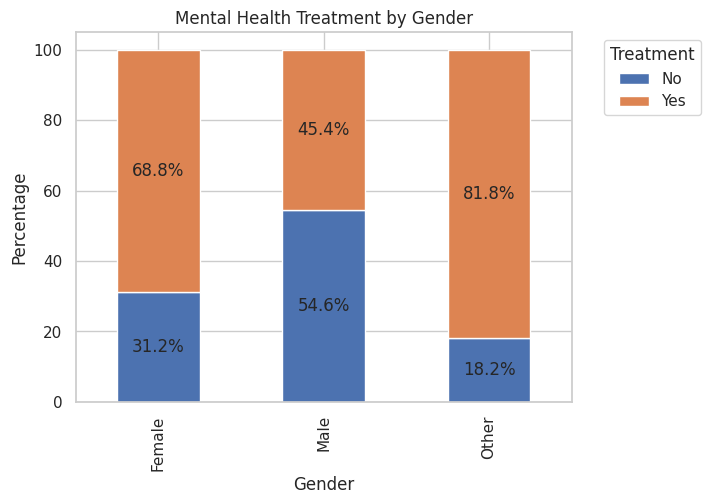

In [52]:
# Chart - 7 visualization code
plt.figure(figsize=(8,5))

# Create crosstab and convert to percentages
gender_treat = pd.crosstab(survey['Gender'], survey['treatment'])
gender_treat_pct = gender_treat.div(gender_treat.sum(axis=1), axis=0) * 100

ax = gender_treat_pct.plot(kind='bar', stacked=True)

plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Mental Health Treatment by Gender")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1))

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart with percentage labels is chosen to compare treatment-seeking behavior across genders while clearly showing the proportional contribution of each treatment category within every gender group.

##### 2. What is/are the insight(s) found from the chart?

* Female and other category respondents show a higher percentage of mental health treatment compared to male respondents.

* Although males form the largest group numerically, they exhibit a lower relative percentage of treatment-seeking, indicating possible stigma or hesitation.

* The chart highlights gender-based differences in mental health awareness and support utilization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying gender-specific treatment patterns, organizations can introduce targeted awareness programs, encourage help-seeking behavior, and reduce stigma—leading to improved employee well-being, engagement, and productivity.

#### Chart - 8 : Work Interference vs Mental Health Treatment

<Figure size 900x500 with 0 Axes>

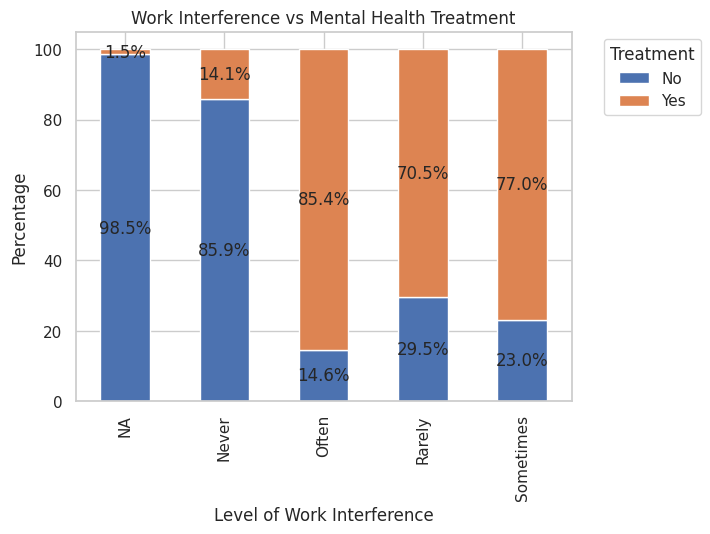

In [53]:
# Chart - 8 visualization code
plt.figure(figsize=(9,5))

# Crosstab and percentage conversion
work_treat = pd.crosstab(survey['work_interfere'], survey['treatment'])
work_treat_pct = work_treat.div(work_treat.sum(axis=1), axis=0) * 100

ax = work_treat_pct.plot(kind='bar', stacked=True)

plt.xlabel("Level of Work Interference")
plt.ylabel("Percentage")
plt.title("Work Interference vs Mental Health Treatment")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1))

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is chosen to compare mental health treatment behavior across different levels of work interference, while also showing the proportional distribution of treatment status within each interference category.

##### 2. What is/are the insight(s) found from the chart?

* Respondents who report that mental health often, sometimes or even rarely interferes with work show a higher percentage of treatment-seeking behavior.

* Employees who report no interference or haven't reported their work interference status are less likely to seek treatment.

* This indicates that the severity of mental health impact directly influences help-seeking behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying early signs of work interference, organizations can introduce preventive mental health support before issues escalate, reducing productivity loss, absenteeism, and employee burnout.

#### Chart - 9 : Mental Health Benefits vs Treatment Sought

<Figure size 900x500 with 0 Axes>

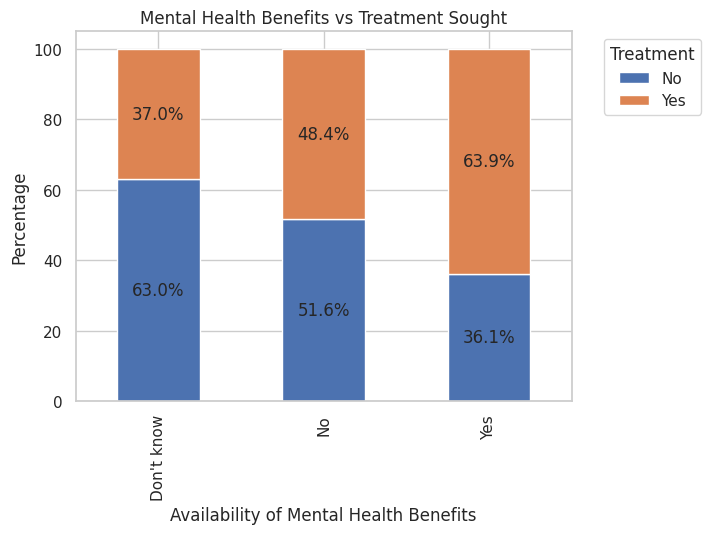

In [54]:
# Chart - 9 visualization code
plt.figure(figsize=(9,5))

# Crosstab and percentage conversion
benefits_treat = pd.crosstab(survey['benefits'], survey['treatment'])
benefits_treat_pct = benefits_treat.div(benefits_treat.sum(axis=1), axis=0) * 100

ax = benefits_treat_pct.plot(kind='bar', stacked=True)

plt.xlabel("Availability of Mental Health Benefits")
plt.ylabel("Percentage")
plt.title("Mental Health Benefits vs Treatment Sought")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1))

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is chosen to analyze how the availability of mental health benefits influences employees' decision to seek treatment, while also showing the proportional differences within each benefits category.

##### 2. What is/are the insight(s) found from the chart?

* Respondents who have access to mental health benefits show a higher percentage of treatment-seeking behavior.

* Employees without benefits or who are unaware of available benefits are a little less likely to seek treatment.

* This suggests that organizational support also plays a role in encouraging mental health care.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Providing mental health benefits increases access to care, reduces long-term absenteeism, and improves employee satisfaction. Organizations that invest in mental health benefits can expect higher retention and productivity.

#### Chart - 10 : Mental Health Treatment by Country

<Figure size 1000x500 with 0 Axes>

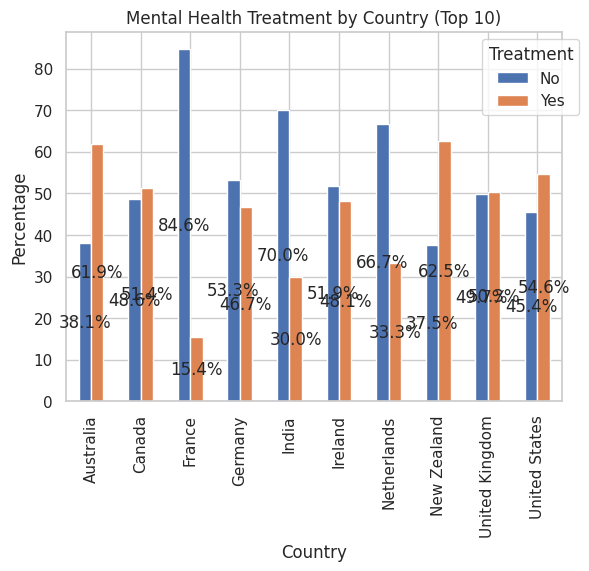

In [55]:
# Chart - 10 visualization code
plt.figure(figsize=(10,5))

# Select top 10 countries by respondent count
top_countries = survey['Country'].value_counts().head(10).index

country_treat = pd.crosstab(
    survey[survey['Country'].isin(top_countries)]['Country'],
    survey['treatment']
)

country_treat_pct = country_treat.div(country_treat.sum(axis=1), axis=0) * 100

ax = country_treat_pct.plot(kind='bar')

plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Mental Health Treatment by Country (Top 10)")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1))

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen to compare mental health treatment-seeking behavior across countries. Focusing on the top 10 countries ensures meaningful comparison.

##### 2. What is/are the insight(s) found from the chart?

* Mental health treatment-seeking behavior varies significantly across countries.

* Anglo countries show higher percentage of people seeking treatment than not when compared to non-anglo countries where percentage of people seekeing treatment is lower than percentage of people not seeking treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Global organizations can use this information to localize mental health policies, ensuring region-specific support systems. Tailored interventions improve employee well-being and organizational effectiveness across geographies.

#### Chart - 11 : Company Size vs Mental Health Treatment

<Figure size 1000x500 with 0 Axes>

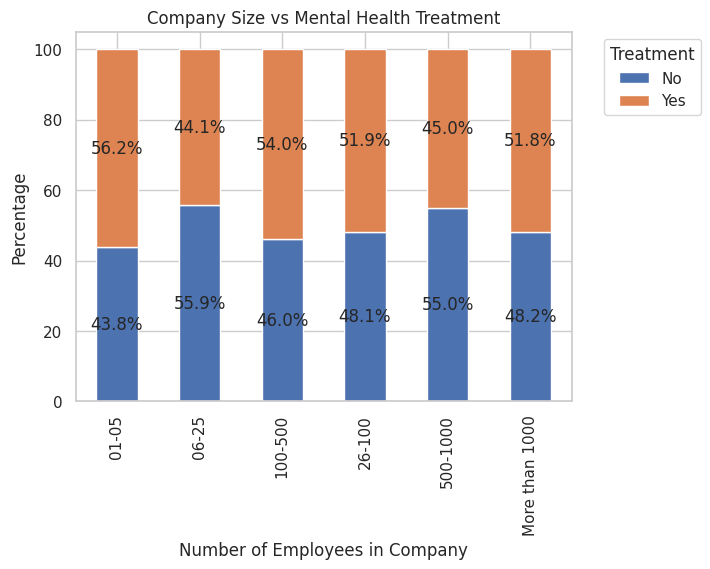

In [56]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))

# Crosstab and percentage conversion
size_treat = pd.crosstab(survey['no_employees'], survey['treatment'])
size_treat_pct = size_treat.div(size_treat.sum(axis=1), axis=0) * 100

ax = size_treat_pct.plot(kind='bar', stacked=True)

plt.xlabel("Number of Employees in Company")
plt.ylabel("Percentage")
plt.title("Company Size vs Mental Health Treatment")
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1))

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart is chosen to compare mental health treatment-seeking behavior across different company size categories, while also showing the proportion of employees who have or have not sought treatment within each company size.

##### 2. What is/are the insight(s) found from the chart?

Overall, company size alone does not appear to be a strong determinant of mental health treatment behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since treatment-seeking behavior remains relatively consistent across company sizes, organizations of all scales should prioritize mental health initiatives. Smaller companies may benefit from external mental health partnerships, while larger companies can continue strengthening formal wellness programs. This ensures employee well-being regardless of organizational size.

#### Chart - 12 : Remote Work and Mental Health Interference

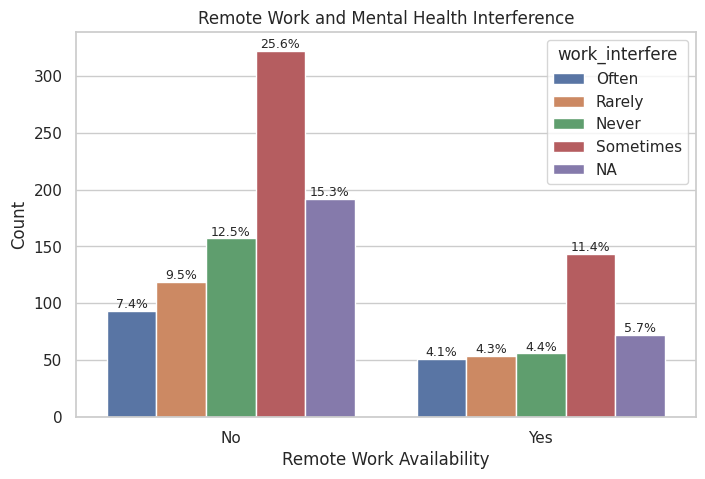

In [57]:
# Chart - 12 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='remote_work',
    hue='work_interfere',
    data=survey
)

plt.title('Remote Work and Mental Health Interference')
plt.xlabel('Remote Work Availability')
plt.ylabel('Count')

# Add percentage labels
total = len(survey)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = (height / total) * 100
        ax.text(x, height, f'{percent:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because both remote work availability and work interference level are categorical variables. This visualization helps compare how mental health affects work performance for employees with and without remote work options.

##### 2. What is/are the insight(s) found from the chart?

* The pattern of mental health interference levels (“Often”, “Sometimes”, “Rarely”, “Never”) is similar for both remote and non-remote employees.

* The absolute counts are lower for employees with remote work availability because fewer respondents work remotely, not because mental health interference is substantially different.

* The proportion of employees reporting “Sometimes” interference remains the dominant category in both groups.

* This suggests that remote work availability alone does not significantly change mental health interference patterns, based on this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart indicates that remote work by itself is not a guaranteed solution for reducing mental health interference. Organizations should combine flexible work options with active mental health support systems, such as workload management, mental health benefits, and open communication, to achieve meaningful improvements.

#### Chart - 13 : Family History and Treatment Seeking

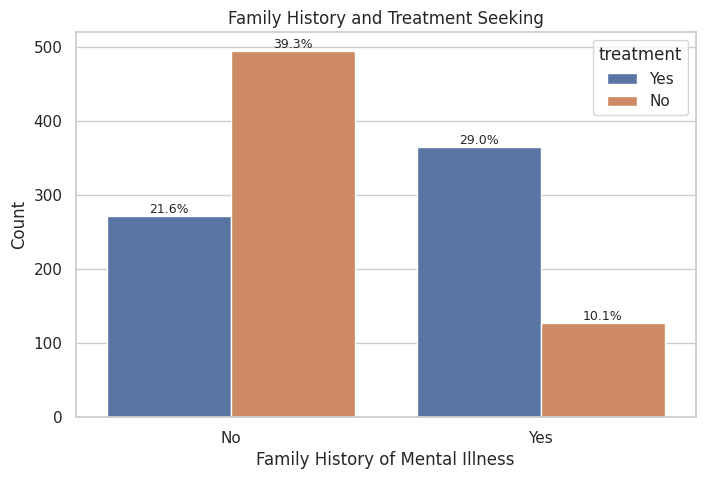

In [58]:
# Chart - 13 visualization code
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='family_history',
    hue='treatment',
    data=survey
)

plt.title('Family History and Treatment Seeking')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')

# Add percentage labels
total_counts = survey['family_history'].value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        category = p.get_x()
        percent = (height / len(survey)) * 100
        ax.text(x, height, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because both family history and treatment are categorical variables. This chart allows clear comparison of treatment-seeking behavior between employees with and without a family history of mental illness.

##### 2. What is/are the insight(s) found from the chart?

* Among respondents without a family history of mental illness, a larger proportion have not sought treatment compared to those who have sought treatment.

* In contrast, respondents with a family history of mental illness show a higher proportion of treatment-seeking behavior, while a much smaller percentage have not sought treatment.

* This clearly indicates that individuals with a family history of mental illness are more likely to seek mental health treatment than those without such a history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that employees with a family history are more inclined to seek treatment highlights the importance of mental health awareness and education. Organizations can use this insight to encourage early help-seeking among employees without prior exposure, thereby reducing untreated mental health issues, improving productivity, and fostering a supportive workplace culture.

#### Chart - 14 : Willingness to Discuss Mental Health: Coworkers vs Supervisor

Text(0, 0.5, 'Count')

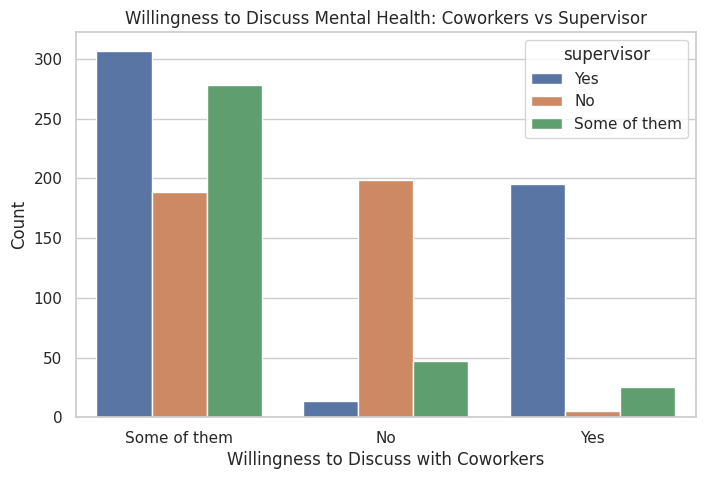

In [59]:
# Chart - 14 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='coworkers',
    hue='supervisor',
    data=survey
)

plt.title('Willingness to Discuss Mental Health: Coworkers vs Supervisor')
plt.xlabel('Willingness to Discuss with Coworkers')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

A count plot is chosen because both willingness to discuss mental health with coworkers and willingness to discuss with supervisors are categorical variables. This chart allows comparison of employees’ comfort levels when discussing mental health with peers versus management.

##### 2. What is/are the insight(s) found from the chart?

* Respondents who say they would discuss with “some of” their coworkers show mixed comfort with supervisors: a substantial share are willing to talk to supervisors, a similar share will discuss with only some supervisors, and a meaningful share will not.

* Those who would not discuss with coworkers are overwhelmingly also unwilling to discuss with supervisors, with very few willing to speak to supervisors.

* Respondents who would discuss mental health with coworkers are largely also willing to discuss it with supervisors, while only a negligible number are not willing to discuss it with their supervisors.

* Overall, employees are more comfortable talking to peers than to supervisors, and there is a clear subgroup that avoids discussing mental health with management.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows a trust gap between staff and management. Addressing this can yield positive outcomes: targeted manager training, clearer communication, and formal channels for confidential conversations can increase supervisor-employee openness. Reducing this gap encourages earlier help-seeking, lowers stigma, and can improve retention and productivity.

#### Chart - 15 : Fear of Mental Health Consequences vs Observed Consequences

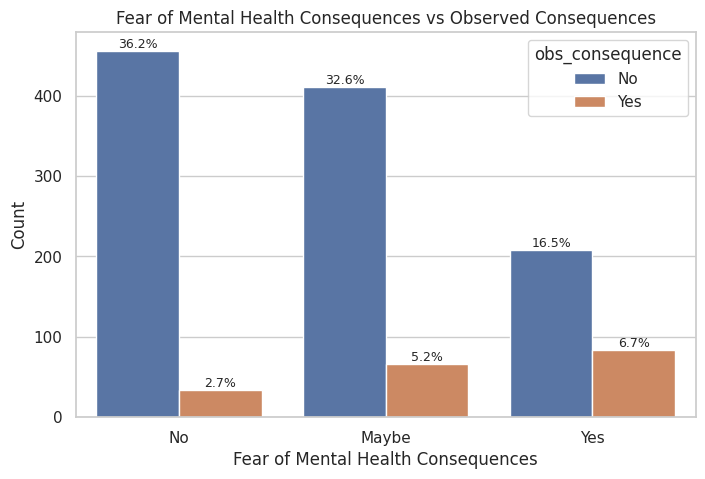

In [60]:
# Chart - 15 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='mental_health_consequence',
    hue='obs_consequence',
    data=survey
)

plt.title('Fear of Mental Health Consequences vs Observed Consequences')
plt.xlabel('Fear of Mental Health Consequences')
plt.ylabel('Count')

# Add percentage labels
total = len(survey)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = (height / total) * 100
        ax.text(x, height, f'{percent:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because both fear of mental health consequences and observed consequences are categorical variables. This chart helps examine whether employees' fear is influenced by actual negative outcomes they have observed in the workplace.

##### 2. What is/are the insight(s) found from the chart?

* Among respondents who report no fear of mental health consequences, the vast majority have not observed negative consequences, with only a very small proportion reporting observed consequences.

* For respondents who answered “Maybe”, most have not observed consequences, but a noticeable minority have observed negative outcomes.

* Among respondents who fear mental health consequences, the proportion who have observed negative consequences is significantly higher compared to those with no fear.

* This pattern suggests that fear of consequences increases when employees have witnessed or are aware of real negative outcomes in the workplace.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since fear of mental health consequences is somewhat associated with observed negative experiences, organizations must focus on eliminating discriminatory practices, reinforcing confidentiality, and promoting psychological safety. Addressing these issues can reduce fear, encourage open communication, and improve overall employee well-being and productivity.

#### Chart - 16 : Anonymity vs Fear of Mental Health Consequences

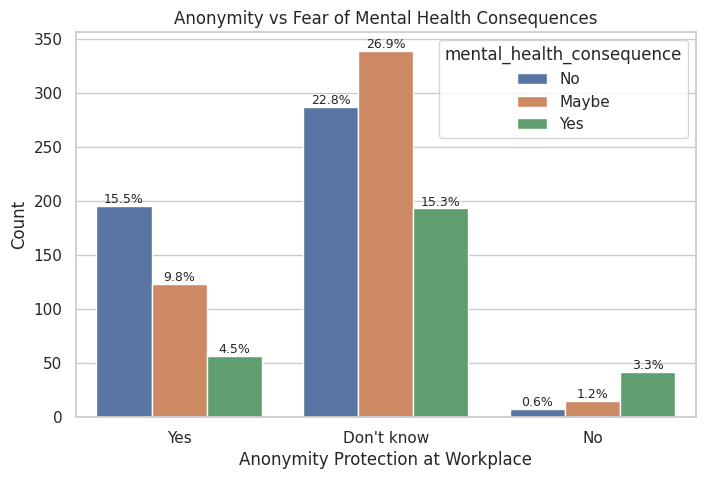

In [61]:
# Chart - 16 visualization code
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='anonymity',
    hue='mental_health_consequence',
    data=survey
)

plt.title('Anonymity vs Fear of Mental Health Consequences')
plt.xlabel('Anonymity Protection at Workplace')
plt.ylabel('Count')

# Add percentage labels
total = len(survey)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = (height / total) * 100
        ax.text(
            x, height,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.show()

##### 1. Why did you pick the specific chart?

A count plot is chosen because both anonymity protection at the workplace and fear of mental health consequences are categorical variables. This visualization helps compare employees' fear levels based on whether they perceive anonymity protection when addressing mental health concerns.

##### 2. What is/are the insight(s) found from the chart?

* Among respondents who believe anonymity protection exists, the majority report no fear of mental health consequences, while a much smaller proportion report fear.

* Respondents who do not know whether anonymity protection exists show higher uncertainty and fear, with about 26.9% responding “Maybe” and  about 15.3% responding “Yes” to fearing consequences.

* For respondents who report no anonymity protection, the proportion fearing consequences is notably higher than those reporting no fear.

* Overall, lack of clarity or absence of anonymity protection is associated with higher fear of negative mental health consequences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart clearly shows that anonymity protection reduces fear, while uncertainty about anonymity increases it. Organizations can improve psychological safety by implementing and clearly communicating confidential and anonymous reporting mechanisms, encouraging early disclosure and support for mental health issues, which ultimately improves employee trust, well-being, and productivity.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the exploratory data analysis, the key challenge identified is not the absence of mental health policies, but the lack of clarity, awareness, and trust surrounding them. The analysis shows high levels of uncertainty around mental health benefits, leave policies, anonymity protection, and the consequences of discussing mental health at work. This uncertainty discourages employees from seeking treatment or openly addressing mental health concerns.

To achieve the business objective, organizations should focus on clearly communicating existing mental health policies, ensuring employees understand how to access benefits, take leave, and use support resources safely. Leadership and managers should be trained to create a supportive and non-judgmental environment, as employees are more comfortable discussing mental health with coworkers than supervisors. Strengthening trust between employees and management is essential.

Additionally, organizations should emphasize confidentiality and anonymity, as fear of negative consequences is closely linked to uncertainty or lack of anonymity protection. Improving transparency, reinforcing mental health parity with physical health, and promoting awareness programs can help reduce stigma, encourage early intervention, and improve overall employee well-being and productivity.

# **Conclusion**

The EDA reveals that mental health challenges in tech are widely present but unevenly addressed. Uncertainty—around consequences, leave, anonymity, and seriousness is a recurring theme. Addressing this uncertainty through transparent policies and supportive leadership is critical. Organizations that proactively invest in mental health infrastructure and culture are better positioned to retain talent, reduce burnout, and foster healthier workplaces.